# Data analysis

### Introduction

This is part of Udacity's data science nanodegree program, and more infomration can be found [here](https://www.udacity.com/nanodegree)

The data used in this post is the *Crop Recommendation* dataset, which is provided by [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/4GBWFV), and is also featured on Kaggle.


We will start the analysis of the data using the CRISP-DM (Cross Industry Standard Process for Data Mining), which will use the following steps:

1. Business Understanding
2. Data Understanding
3. Data Preparation and Cleaning
4. Data Modelling
5. Result Evaluation

### Business understanding 

According to the data source, this dataset was made by augmenting optimum soil and environmental characteristics for crop growth. It contains soil and enviromental conditions, and the crop that match the condition. Based on the information, we would like to get answer to the followiwng 
 
- What is the most suitable growth condition for each type of plant in the dataset?
- Are there any incompatiable plants, where their best growth condition doesn't match?
- Given the growth condition, what is the most recommended crop?


### Data Understanding 

It's time to do some exploratory data analysis

In [132]:
# Import the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import scipy

df = pd.read_csv('./Crop_recommendation.csv')
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


As seen the dataset conntains the following information about the enviromental and soil conditions,  
- N (nitrogen)
- P (phosphors)
- K (potassium)
- Temperature
- Humidity
- pH
- Rainfall

In the label column, a crop was associated with the conditions 

In [133]:
## Are there any empty or missing values in the dataset?

df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

The data does not contain any null values. The provider may have already cleaned the data before uploading. 

In [134]:
# What's the dataset size and how many crops has been recommended by the dataset
print(df.shape)
crops = df['label'].unique()
print(crops)

(1697, 8)
['rice' 'maize' 'Soyabeans' 'beans' 'peas' 'groundnuts' 'cowpeas' 'banana'
 'mango' 'grapes' 'watermelon' 'apple' 'orange' 'cotton' 'coffee']


In [135]:
df.groupby('label')['N'].count()

label
Soyabeans     130
apple         100
banana        130
beans         125
coffee        110
cotton        100
cowpeas       122
grapes        100
groundnuts    100
maize         119
mango         100
orange        122
peas          100
rice          139
watermelon    100
Name: N, dtype: int64

So there are 1697 recommendation and a total of 15 types of crops. 


### Question 1  What's the suitable growth condition for each crop in the dataset?

For the sake of simplicity, we are only going to collect the min and max value of each growth condition for each crop. 


In [136]:
# Get statistics for each group
growth_condition = df.groupby('label').describe()

# Only keep min/max for each nutrient and drop everything else

minmax = growth_condition.drop(['count', 'mean', 'std', '25%', '50%', '75%'], axis=1, level=1)

minmax


N             P             K        temperature             \
              min    max    min    max    min    max         min        max   
label                                                                         
Soyabeans    20.0   60.0   55.0   80.0   75.0   85.0   17.024985  21.195022   
apple         0.0   40.0  120.0  145.0  195.0  205.0   21.036527  23.996862   
banana       80.0  120.0   70.0   95.0   45.0   55.0   25.010185  30.267924   
beans         0.0   40.0   55.0   80.0   15.0   25.0   15.330426  24.923601   
coffee       80.0  120.0   15.0   40.0   25.0   35.0   23.059519  27.923744   
cotton      100.0  140.0   35.0   60.0   15.0   25.0   22.000851  25.992374   
cowpeas       0.0   40.0   35.0   60.0   15.0   25.0   27.014704  29.914544   
grapes        0.0   40.0  120.0  145.0  195.0  205.0    8.825675  41.948657   
groundnuts    0.0   40.0   35.0   60.0   15.0   25.0   24.018254  31.999286   
maize        60.0  100.0   35.0   60.0   15.0   25.0   18.041855  26.549864   
mango         0.0   40.0   15.0   40.0   25.0   35.0   27.003155  35.990097   
orange        0.0   40.0    5.0   30.0    5.0   15.0   10.010813  34.906653   
peas          0.0   40.0   55.0   80.0   15.0   25.0   18.319104  36.977944   
rice         60.0   99.0   35.0   60.0   35.0   45.0   20.045414  27.300796   
watermelon   80.0  120.0    5.0   30.0   45.0   55.0   24.043558  26.986037   

             humidity                   ph              rainfall              
                  min        max       min       max         min         max  
label                                                                         
Soyabeans   14.258040  20.160130  5.988993  8.868741   65.113656   95.709920  
apple       90.025751  94.920481  5.514253  6.499227  100.117344  124.983162  
banana      75.031933  84.978492  4.519088  6.490074   90.109781  119.847970  
beans       18.092240  24.969699  5.502999  5.998125   60.275525  149.744103  
coffee      50.045570  69.948073  6.020947  7.493192  115.156401  199.473564  
cotton      75.005393  84.876690  5.801048  7.994680   60.653817   99.931008  
cowpeas     80.034996  89.996156  6.218924  7.199495   36.120429   59.872321  
grapes      80.016394  83.983517  5.510925  6.499605   65.010953   74.915062  
groundnuts  40.009334  64.955854  3.504752  9.935091   30.920140   74.443307  
maize       55.282204  74.829137  5.513698  8.967058   60.651715  109.751538  
mango       45.022364  54.964053  4.507524  6.967418   89.291476  100.812466  
orange      90.006217  94.964199  6.010392  7.995849  100.173796  119.694658  
peas        30.400468  69.691413  4.548202  7.445445   90.054227  198.829881  
rice        80.122675  85.343760  5.005307  8.140207    5.314507  298.560117  
watermelon  80.026213  89.984052  6.000976  6.956509   40.126504   59.759800

To visualize the growth condition for each crop, some strip plots are rendered below. Since there are 13 crops and only 7 growth conditions, I will plot the crops to the nutrients to save some space.

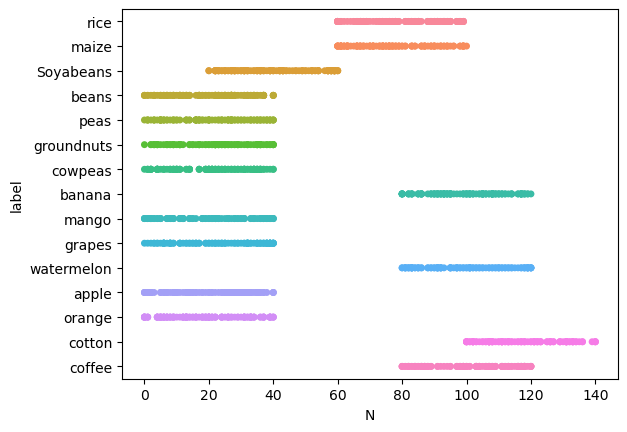

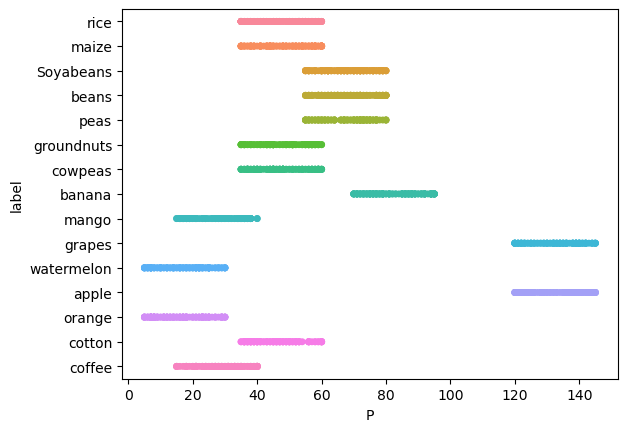

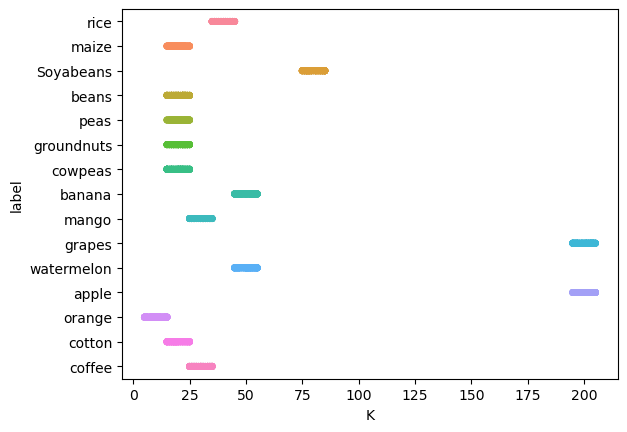

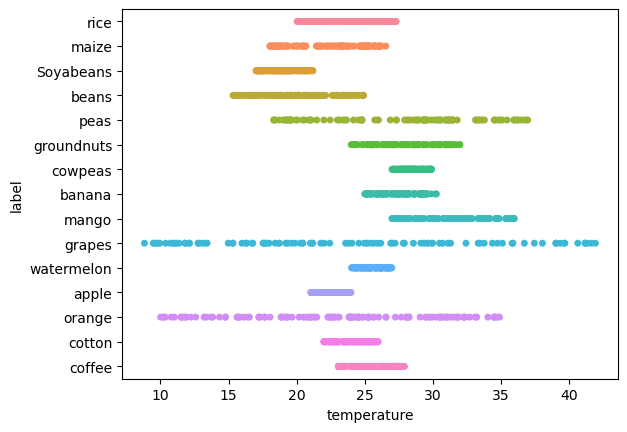

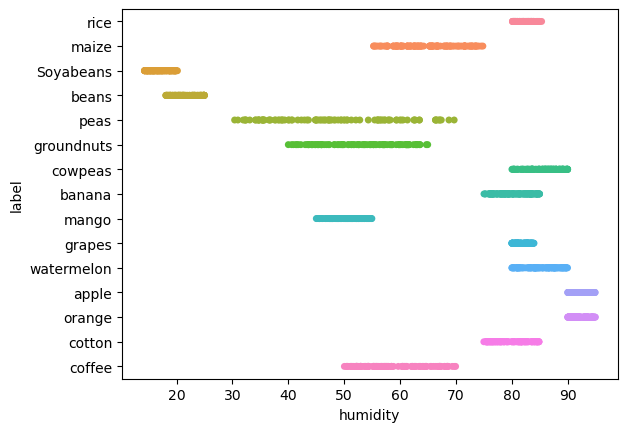

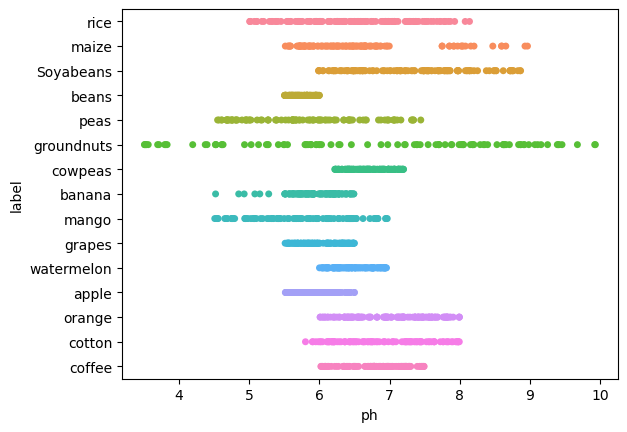

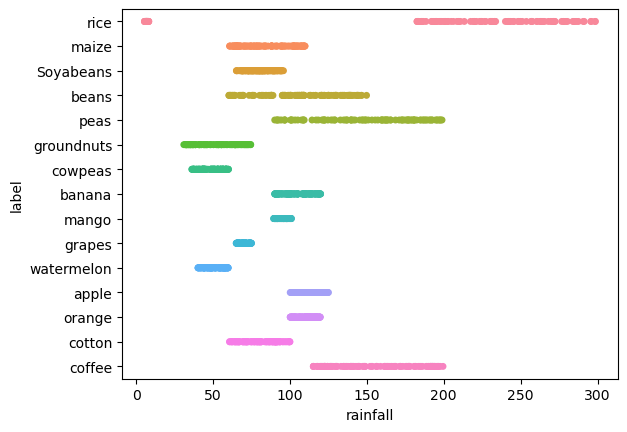

In [137]:
cols = list(df.select_dtypes(include=[int, float]).columns)

for col in cols:
    plt.figure()
    sns.stripplot(data=df, x=col, y='label', jitter=False)



### Question 2 - What Crops are incompatible with each other?

To find out which crops cannot be planted together, I will loop through the types and nutrients, and compare the nutrient min/max range across crops. If the ranges do not match, the two crops are incompatible.



In [138]:
## Create a incompatible_df, which is square matrix from crops x crops.transpose(), then fill value to 1
## If any range mismatch is found between two crops, set the value to 0

crops = minmax.index.tolist()
environment = df.columns.drop('label').tolist()
incompatible_df = pd.DataFrame(index=crops, columns=crops)
incompatible_df.fillna(1, inplace=True)
for c1 in crops:
    for c2 in crops:
        if c1 == c2:
            continue
        for e in environment:
            if (minmax.loc[c1, (e, 'min')] > minmax.loc[c2, (e, 'max')]) or (minmax.loc[c1, (e, 'max')] < minmax.loc[c2, (e, 'min')]):
                incompatible_df.loc[c1, c2] = 0
        


In [139]:
incompatible_df

,Soyabeans,apple,banana,beans,coffee,cotton,cowpeas,grapes,groundnuts,maize,mango,orange,peas,rice,watermelon
Soyabeans,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
apple,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
banana,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
beans,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
coffee,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
cotton,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
cowpeas,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
grapes,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
groundnuts,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
maize,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Question 3 Given the growth condition, what is the most recommended crop?

In this section we will use 5 popular classification algorithms to build a model for crop recommendations. Since this is a single label, multi-output classification task, precision, recall, and f1 score would be used to evaluate the performance metrics.Since the every column in the dataset seems very clustered, KNearest Neighbor and Decision Tree algorithm is appropriate for the task, we will also try two other algorithms, svm classifier and logistic as well. All algorithms will be used with default settings.


In [140]:
# Building models with different classification algorithms
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

def decision_tree(X_train, X_test, y_train, y_test, random_state=42):
    '''
    Building a decision tree classifier based on train/test set and return model score, and print out classification report
    Input - X_train, X_test, y_train, y_test
    Output - f1 score from training set and test set
    '''
    clf = DecisionTreeClassifier(random_state=random_state)
    clf = clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    train_score = f1_score(y_train, y_train_pred, average='micro')
    test_score = f1_score(y_test, y_test_pred, average='micro')
    print('DecisionTree Classifier')
    print(classification_report(y_test, y_test_pred))
    return train_score, test_score


def knn(X_train, X_test, y_train, y_test, n_neighbors=10):
    '''
    Building a KNearest Neighbor classifier based on train/test set and return model score, and print out classification report
    Input - X_train, X_test, y_train, y_test
    Output - f1 score from training set and test set
    '''
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf = clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    train_score = f1_score(y_train, y_train_pred, average='micro')
    test_score = f1_score(y_test, y_test_pred, average='micro')
    print('KNearestNeighbor Classifier')
    print(classification_report(y_test, y_test_pred))
    return train_score, test_score

def svmc(X_train, X_test, y_train, y_test, random_state=42, kernel='linear'):
    '''
    Building a support vector machine classifier based on train/test set and return model score, and print out classification report
    Input - X_train, X_test, y_train, y_test
    Output - f1 score from training set and test set
    '''
    clf = SVC(random_state=random_state, kernel=kernel)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    train_score = f1_score(y_train, y_train_pred, average='micro')
    test_score = f1_score(y_test, y_test_pred, average='micro')
    print('SVM Classifier')
    print(classification_report(y_test, y_test_pred))
    return train_score, test_score

def logistic(X_train, X_test, y_train, y_test, random_state=42, solver='lbfgs'):
    '''
    Building a logistic regression classifier based on train/test set and return model score, and print out classification report
    Input - X_train, X_test, y_train, y_test
    Output - f1 score from training set and test set
    '''
    clf = LogisticRegression(random_state=random_state, solver=solver)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    train_score = f1_score(y_train, y_train_pred, average='micro')
    test_score = f1_score(y_test, y_test_pred, average='micro')
    print('Logistic Classifier')
    print(classification_report(y_test, y_test_pred))
    return train_score, test_score


def nn(X_train, X_test, y_train, y_test, random_state=42):
    '''
    Building a neural network classifier based on train/test set and return model score, and print out classification report
    Input - X_train, X_test, y_train, y_test
    Output - f1 score from training set and test set
    '''
    clf = MLPClassifier(activation = 'relu', random_state=42, max_iter=2000)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    train_score = f1_score(y_train, y_train_pred, average='micro')
    test_score = f1_score(y_test, y_test_pred, average='micro')
    print('Neural Network Classifier')
    print(classification_report(y_test, y_test_pred))
    return train_score, test_score


Running and summarizing all the classification methods together, and seeing their scores 


In [141]:
# Preprocess the data and split into train/test set

from sklearn.preprocessing import MinMaxScaler

# Train test split
X = df.drop(labels='label', axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [142]:
# Run the classifiers

functions = [decision_tree, knn, svmc, logistic, nn]
function_names = ['decision_tree', 'knn', 'svmc', 'logistic', 'nn']

result = []
for func in functions:
    scores = func(X_train, X_test, y_train, y_test)
    app = {'Training f1 score': scores[0], 'Testing f1 score': scores[1]}
    result.append(app)



DecisionTree Classifier
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        41
       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        39
       beans       1.00      1.00      1.00        45
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        39
     cowpeas       1.00      1.00      1.00        32
      grapes       1.00      1.00      1.00        32
  groundnuts       1.00      1.00      1.00        36
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        36
        peas       1.00      1.00      1.00        35
        rice       1.00      1.00      1.00        29
  watermelon       1.00      1.00      1.00        26

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
we

<AxesSubplot:>

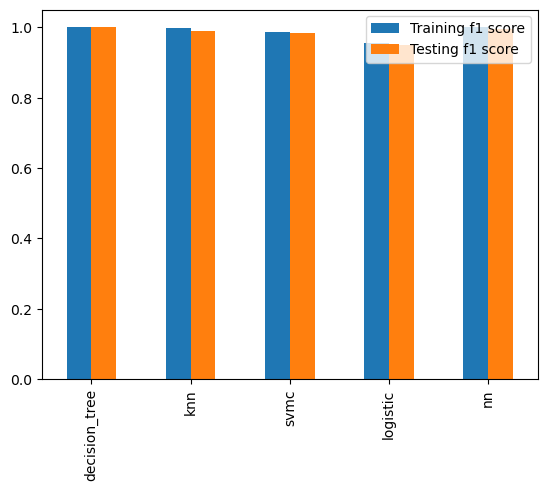

In [143]:
# Creating a dataframe of the model scores and plotting
result_df= pd.DataFrame(result)
result_df.index = function_names
result_df.transpose()
result_df.plot.bar()